## Data Modelling & Metrics ##

Modelling using four classified Models:
- K-Nearest Neighbors (KNN)
- Decision Trees
- Logistic Regression
- Support Vector Machines (SVM)

Metrics for Evaluation used:
- Accuracy
- Precision
- Recall
- F1-Score
- AUC-ROC Curve

**Import Libraries**

In [52]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV

**Load Training and Test Set Data**

In [53]:
X_train = pd.read_csv('../data/X_train.csv')
X_test = pd.read_csv('../data/X_test.csv')
y_train = pd.read_csv('../data/y_train.csv')
y_test = pd.read_csv('../data/y_test.csv')

**Define Models**

In [54]:
models = {
    "knn": KNeighborsClassifier(),
    "descisiontree": DecisionTreeClassifier(),
    "logisticregression": LogisticRegression(),
    "svm": SVC(probability=True)
}
    

**Define Hyperparamters for Models**

In [55]:
# Define hyperparameter grids for each model
param_grids = {
    "knn": {
        "n_neighbors": [3, 5, 7, 9],
        "weights": ["uniform", "distance"]
    },
    "descisiontree": {
        "max_depth": [None, 10, 20, 30],
        "min_samples_split": [2, 5, 10]
    },
    "logisticregression": {
        "C": [0.01, 0.1, 1.0, 10.0],
        "solver": ["saga", "liblinear"],
         "max_iter" : [1000]
    },
    "svm": {
        "C": [0.1, 1.0, 10.0],
        "gamma": ["scale", "auto"]
    }
}

**Evalute Models**

Model: knn
              precision    recall  f1-score   support

          no       0.91      0.97      0.94      1101
         yes       0.51      0.23      0.32       135

    accuracy                           0.89      1236
   macro avg       0.71      0.60      0.63      1236
weighted avg       0.87      0.89      0.87      1236

AUC-ROC: 0.81


/opt/anaconda3/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


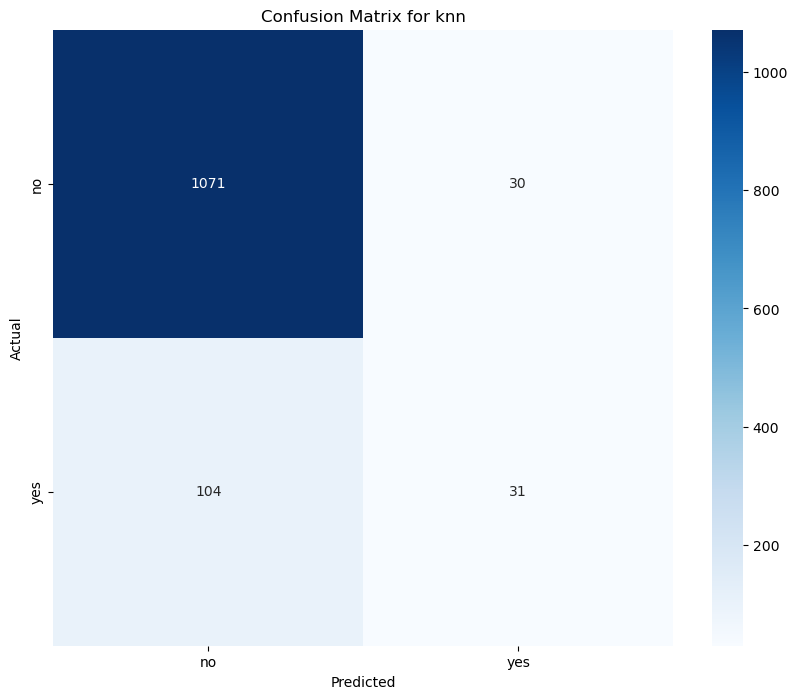

Model: descisiontree
              precision    recall  f1-score   support

          no       0.94      0.93      0.94      1101
         yes       0.49      0.53      0.51       135

    accuracy                           0.89      1236
   macro avg       0.71      0.73      0.72      1236
weighted avg       0.89      0.89      0.89      1236

AUC-ROC: 0.73


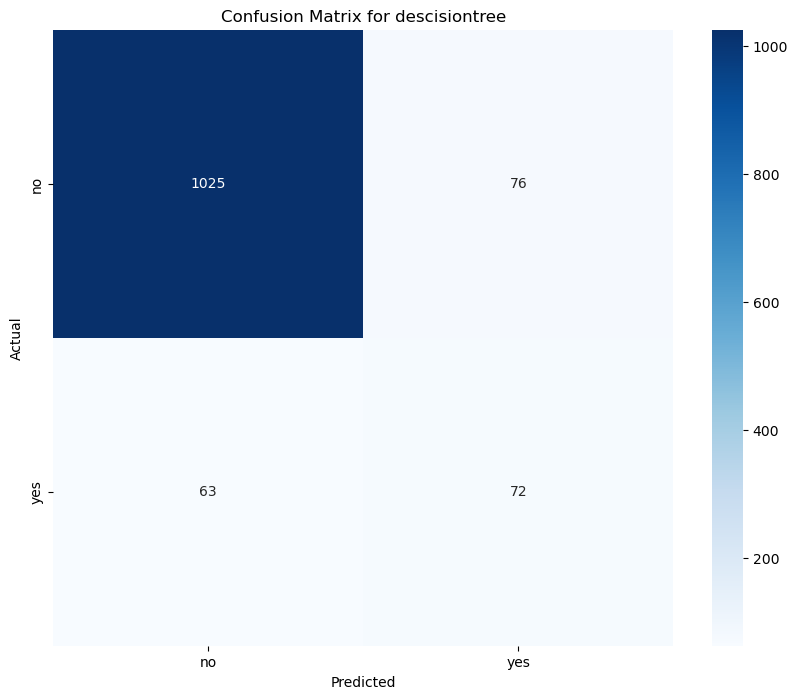

Model: logisticregression
              precision    recall  f1-score   support

          no       0.93      0.97      0.95      1101
         yes       0.64      0.38      0.47       135

    accuracy                           0.91      1236
   macro avg       0.78      0.68      0.71      1236
weighted avg       0.90      0.91      0.90      1236

AUC-ROC: 0.92


/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


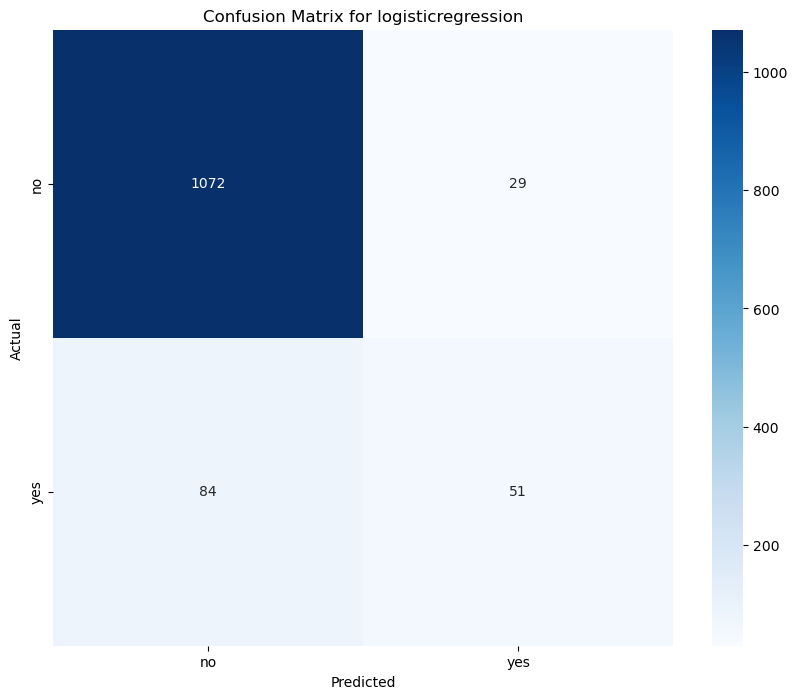

/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model: svm
              precision    recall  f1-score   support

          no       0.92      0.98      0.95      1101
         yes       0.68      0.27      0.38       135

    accuracy                           0.91      1236
   macro avg       0.80      0.63      0.67      1236
weighted avg       0.89      0.91      0.89      1236

AUC-ROC: 0.91


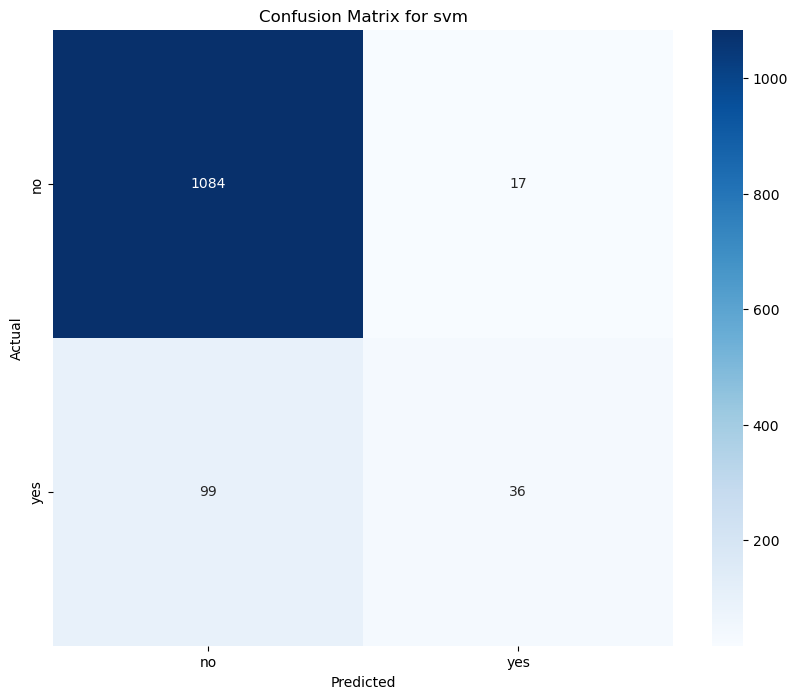

In [56]:
outputs = {}
test_mapped = y_test['y'].map({"no": 0, "yes": 1})

for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on test data
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] 
    
    # Metrics
    print(f"Model: {name}")
    print(classification_report(y_test, y_pred, target_names=["no", "yes"]))
    roc_auc = roc_auc_score(test_mapped, y_proba)
    print(f"AUC-ROC: {roc_auc:.2f}")
    
    # Store outputa
    outputs[name] = {
        "classification_report": classification_report(y_test, y_pred, target_names=["no", "yes"], output_dict=True),
        "roc_auc": roc_auc 
    }
    
    # Plot confusion matrix
    cm = confusion_matrix(y_test, y_pred, labels=["no", "yes"])
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=["no", "yes"], yticklabels=["no", "yes"])
    plt.title(f"Confusion Matrix for {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

**Applying Hyperparameter Optimization on Models**

Optimized Model Name: knn...
Fitting 5 folds for each of 8 candidates, totalling 40 fits


/opt/anaconda3/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n

Best Parameters for knn: {'n_neighbors': 9, 'weights': 'distance'}
AUC-ROC for Optimized Model Name: knn: 0.83
Optimized Model Name: descisiontree...
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Parameters for descisiontree: {'max_depth': 10, 'min_samples_split': 10}
AUC-ROC for Optimized Model Name: descisiontree: 0.82
Optimized Model Name: logisticregression...
Fitting 5 folds for each of 8 candidates, totalling 40 fits


/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samp

Best Parameters for logisticregression: {'C': 1.0, 'max_iter': 1000, 'solver': 'liblinear'}
AUC-ROC for Optimized Model Name: logisticregression: 0.92
Optimized Model Name: svm...
Fitting 5 folds for each of 6 candidates, totalling 30 fits


/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samp

Best Parameters for svm: {'C': 1.0, 'gamma': 'scale'}
AUC-ROC for Optimized Model Name: svm: 0.91


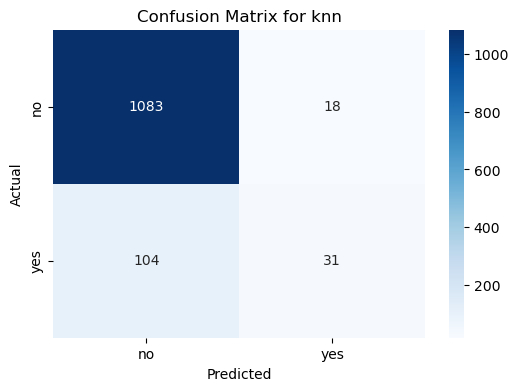

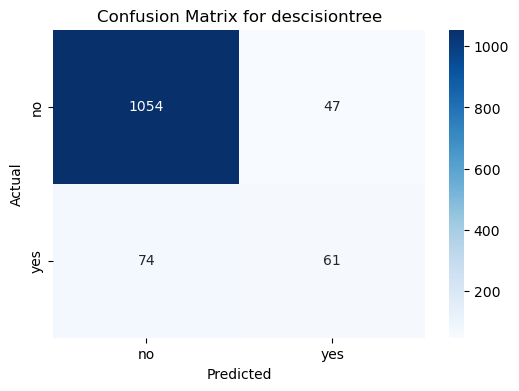

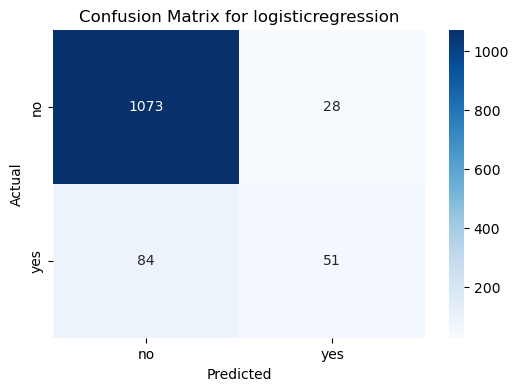

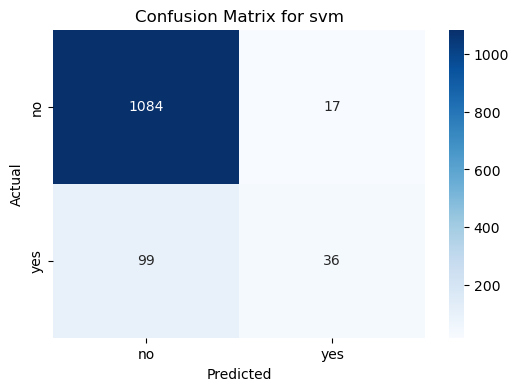

In [57]:

optimized_output = {}
for name, model in models.items():
    print(f"Optimized Model Name: {name}...")
    grid_search = GridSearchCV(estimator=model, param_grid=param_grids[name], scoring='roc_auc', cv=5, verbose=1, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    
    # Store the best model and its performance
    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_
    y_pred = best_model.predict(X_test)
    y_proba = best_model.predict_proba(X_test)[:, 1] 
    auc_roc = roc_auc_score(test_mapped, y_proba)
    
    print(f"Best Parameters for {name}: {best_params}")
    print(f"AUC-ROC for Optimized Model Name: {name}: {auc_roc:.2f}")
    
    # Save results
    optimized_output[name] = {
        "best_model": best_model,
        "best_params": best_params,
        "auc_roc": auc_roc,
        "classification_report": classification_report(y_test, y_pred, target_names=["no", "yes"], output_dict=True),
    }

#Confusion Matrix for Optimized Models
for name, result in optimized_output.items():
    best_model = result["best_model"]
    y_pred = best_model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred, labels=["no", "yes"])
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=["no", "yes"], yticklabels=["no", "yes"])
    plt.title(f"Confusion Matrix for {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

#### Tabular Output Analysis ####

In [58]:
results_df = pd.DataFrame(columns=["Model", "Accuracy", "Precision (no)", "Precision (yes)", "Recall (no)", "Recall (yes)", "F1-Score (no)", "F1-Score (yes)", "AUC-ROC"])
for name, output in outputs.items():
    results_df.loc[len(results_df)] = [name, output['classification_report']['accuracy'], output['classification_report']['no']['precision'], output['classification_report']['yes']['precision'], output['classification_report']['no']['recall'], output['classification_report']['yes']['recall'], output['classification_report']['no']['f1-score'], output['classification_report']['yes']['f1-score'], output['roc_auc']]

for name, output in optimized_output.items():
    name = f"{name}({output['best_params']})"
    results_df.loc[len(results_df)] = [name, output['classification_report']['accuracy'], output['classification_report']['no']['precision'], output['classification_report']['yes']['precision'], output['classification_report']['no']['recall'], output['classification_report']['yes']['recall'], output['classification_report']['no']['f1-score'], output['classification_report']['yes']['f1-score'], output['auc_roc']]

results_df.set_index("Model", inplace=True)
results_df

,Accuracy,Precision (no),Precision (yes),Recall (no),Recall (yes),F1-Score (no),F1-Score (yes),AUC-ROC
Model,,,,,,,,
knn,0.891586,0.911489,0.508197,0.972752,0.229630,0.941125,0.316327,0.805540
descisiontree,0.887540,0.942096,0.486486,0.930972,0.533333,0.936501,0.508834,0.732153
logisticregression,0.908576,0.927336,0.637500,0.973660,0.377778,0.949934,0.474419,0.923766
svm,0.906149,0.916314,0.679245,0.984559,0.266667,0.949212,0.382979,0.907488
"knn({'n_neighbors': 9, 'weights': 'distance'})",0.901294,0.912384,0.632653,0.983651,0.229630,0.946678,0.336957,0.831480
"descisiontree({'max_depth': 10, 'min_samples_split': 10})",0.902104,0.934397,0.564815,0.957312,0.451852,0.945716,0.502058,0.817398
"logisticregression({'C': 1.0, 'max_iter': 1000, 'solver': 'liblinear'})",0.909385,0.927398,0.645570,0.974569,0.377778,0.950399,0.476636,0.923760
"svm({'C': 1.0, 'gamma': 'scale'})",0.906149,0.916314,0.679245,0.984559,0.266667,0.949212,0.382979,0.907451


#### Observations ####

1. Logistic Regression has higher accuracy in both evaluations (Normal & with Hyperparameter Optimization) 
i.e. 90.9% and best AUC-ROC i.e.  92.3 % compared to all other models.
2. F1 score (yes) - Descision Tree Optimized the best i.e. 50.6%
3. F1 score(no) - All models are pretty close

Overall, Logistic regression performs is best and is the right choice for this dataset